In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Read in Player data
player_df = pd.read_excel('NBA_game_data_EXPANDED.xlsx')

In [52]:
# Read in Team data
team_df = pd.read_excel('NBA_team_data.xlsx')

In [54]:
# Drop columns from players that are not needed
player_df = player_df.drop(columns=['RANK', 'Season_type', 'MIN', 'FGM', 'FGA', 'FG3M', 'FTM', 'FTA', 'OREB', 'DREB', 'PF', 'AST_TOV', 'STL_TOV'])


In [55]:
# Drop columns from teams that are not needed
team_df = team_df.drop(columns=['Season_type'])

**Creating Stats per Game Columns**

In [56]:
# Create a points per game column
player_df['PPG'] = player_df['PTS'] / player_df['GP']

# Create an assists per game column
player_df['APG'] = player_df['AST'] / player_df['GP']

# Create a rebounds per game column
player_df['RPG'] = player_df['REB'] / player_df['GP']

# Create a steals per game column
player_df['SPG'] = player_df['STL'] / player_df['GP']

# Create a blocks per game column
player_df['BPG'] = player_df['BLK'] / player_df['GP']

# Create a turnovers per game column
player_df['TPG'] = player_df['TOV'] / player_df['GP']



**Ranking PTS, AST, REB, STL, and BLK for each year**

In [57]:
# Create a column for total Points, Assists, Rebounds, Steals, and Blocks that ranks the player in the league for that stat for that season
player_df['PTS_RANK'] = player_df.groupby(['Year'])['PTS'].rank(ascending=False)
player_df['AST_RANK'] = player_df.groupby(['Year'])['AST'].rank(ascending=False)
player_df['REB_RANK'] = player_df.groupby(['Year'])['REB'].rank(ascending=False)
player_df['STL_RANK'] = player_df.groupby(['Year'])['STL'].rank(ascending=False)
player_df['BLK_RANK'] = player_df.groupby(['Year'])['BLK'].rank(ascending=False)


**Adding in the Team's Win Percentage and Overall League Standing to Player Dataframe**

In [58]:
# Use the TEAM_ID and Year columns to create a column in player_df that shows the team's W_PCT for that season
player_df['TEAM_W_PCT'] = player_df.apply(lambda x: team_df.loc[(team_df['TEAM_ID'] == x['TEAM_ID']) & (team_df['Year'] == x['Year'])]['W_PCT'].values[0], axis=1)

# Use the TEAM_ID and Year columns to create a column in player_df that shows the team's LEAGUE_RANK for that season
player_df['TEAM_LEAGUE_RANK'] = player_df.apply(lambda x: team_df.loc[(team_df['TEAM_ID'] == x['TEAM_ID']) & (team_df['Year'] == x['Year'])]['W_PCT_RANK'].values[0], axis=1)

player_df

,Year,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,FG_PCT,FG3A,FG3_PCT,FT_PCT,...,SPG,BPG,TPG,PTS_RANK,AST_RANK,REB_RANK,STL_RANK,BLK_RANK,TEAM_W_PCT,TEAM_LEAGUE_RANK
0,1996-97,893,Michael Jordan,1610612741,CHI,82,0.486,297,0.374,0.833,...,1.707317,0.536585,2.024390,1.0,30.0,58.0,17.0,83.5,0.256,28
1,1996-97,252,Karl Malone,1610612762,UTA,82,0.550,13,0.000,0.755,...,1.378049,0.585366,2.841463,2.0,27.0,7.0,36.5,72.5,0.537,11
2,1996-97,779,Glen Rice,1610612766,CHH,79,0.477,440,0.470,0.867,...,0.911392,0.329114,2.240506,3.0,112.5,116.5,96.5,130.0,0.537,11
3,1996-97,782,Mitch Richmond,1610612758,SAC,81,0.454,477,0.428,0.861,...,1.456790,0.296296,2.925926,4.0,33.0,114.0,34.0,143.0,0.744,1
4,1996-97,84,Latrell Sprewell,1610612744,GSW,80,0.449,415,0.354,0.843,...,1.650000,0.562500,4.025000,5.0,15.0,89.0,19.0,80.5,0.256,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12823,2022-23,1631214,Alondes Williams,1610612751,BKN,1,0.000,0,0.000,0.000,...,0.000000,0.000000,2.000000,537.0,532.0,531.0,526.0,515.0,0.549,9
12824,2022-23,1629126,Deonte Burton,1610612758,SAC,2,0.000,1,0.000,0.000,...,0.000000,0.000000,0.000000,537.0,532.0,536.0,526.0,515.0,0.585,7
12825,2022-23,1628402,Frank Jackson,1610612762,UTA,1,0.000,1,0.000,0.000,...,0.000000,0.000000,0.000000,537.0,519.5,526.0,526.0,515.0,0.451,22
12826,2022-23,1630701,Michael Foster Jr.,1610612755,PHI,1,0.000,0,0.000,0.000,...,0.000000,0.000000,0.000000,537.0,532.0,536.0,526.0,515.0,0.659,3


**Analyzing the past MVP winners**

In [59]:
# Get the MVP for each season
mvp_df = player_df.loc[player_df['MVP'] == 1]
mvp_df

,Year,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,FG_PCT,FG3A,FG3_PCT,FT_PCT,...,SPG,BPG,TPG,PTS_RANK,AST_RANK,REB_RANK,STL_RANK,BLK_RANK,TEAM_W_PCT,TEAM_LEAGUE_RANK
1,1996-97,252,Karl Malone,1610612762,UTA,82,0.550,13,0.000,0.755,...,1.378049,0.585366,2.841463,2.0,27.0,7.0,36.5,72.5,0.537,11
433,1997-98,893,Michael Jordan,1610612741,CHI,82,0.465,126,0.238,0.784,...,1.719512,0.548780,2.256098,1.0,43.0,58.0,13.0,83.5,0.756,1
870,1998-99,252,Karl Malone,1610612762,UTA,49,0.493,1,0.000,0.788,...,1.265306,0.571429,3.306122,3.0,32.0,14.0,45.0,71.0,0.740,1
1305,1999-00,406,Shaquille O'Neal,1610612747,LAL,79,0.574,1,0.000,0.524,...,0.455696,3.025316,2.822785,1.0,50.5,2.0,204.0,3.0,0.817,1
1745,2000-01,947,Allen Iverson,1610612755,PHI,71,0.420,306,0.320,0.814,...,2.507042,0.281690,3.338028,2.0,39.0,145.5,2.0,174.0,0.683,2
2186,2001-02,1495,Tim Duncan,1610612759,SAS,82,0.508,10,0.100,0.799,...,0.743902,2.475610,3.207317,2.0,46.0,1.0,123.0,3.0,0.707,2
2630,2002-03,1495,Tim Duncan,1610612759,SAS,81,0.513,22,0.273,0.710,...,0.679012,2.925926,3.061728,6.0,39.5,3.0,146.5,2.0,0.732,1
3053,2003-04,708,Kevin Garnett,1610612750,MIN,82,0.499,43,0.256,0.791,...,1.463415,2.170732,2.585366,1.0,22.0,1.0,19.0,9.0,0.707,2
3546,2004-05,959,Steve Nash,1610612756,PHX,75,0.502,218,0.431,0.887,...,0.986667,0.080000,3.266667,52.0,1.0,157.5,82.0,311.5,0.756,1
3987,2005-06,959,Steve Nash,1610612756,PHX,79,0.512,342,0.439,0.921,...,0.772152,0.151899,3.493671,29.0,1.0,109.5,97.0,228.0,0.659,4


In [102]:
# Get PPG, APG, RPG, SPG, BPG, TPG, PTS_RANK, AST_RANK, REB_RANK, STL_RANK, BLK_RANK, TEAM_W_PCT, TEAM_LEAGUE_RANK from mvp_df
mvp_df = mvp_df[['Year', 'PLAYER', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
mvp_df.describe()


,PPG,APG,RPG,SPG,BPG,TPG,PTS_RANK,AST_RANK,REB_RANK,STL_RANK,BLK_RANK,TEAM_W_PCT,TEAM_LEAGUE_RANK
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,27.020355,6.355970,8.654168,1.380852,0.983859,3.300481,5.444444,21.481481,41.388889,46.444444,80.055556,0.726000,2.703704
std,3.934010,2.313281,3.489424,0.502335,0.814588,0.622381,10.714237,19.214118,46.762973,54.301922,82.695727,0.081195,2.971853
min,15.533333,3.371795,3.320000,0.455696,0.080000,2.141026,1.000000,1.000000,1.000000,1.000000,2.000000,0.537000,1.000000
25%,24.788224,4.319660,5.617860,0.993333,0.518293,3.018519,2.000000,6.000000,5.500000,8.000000,26.500000,0.689000,1.000000
50%,27.426829,5.888889,8.026316,1.378049,0.728395,3.306122,2.000000,15.000000,25.000000,19.000000,51.500000,0.732000,1.000000
75%,29.690706,7.814696,11.652778,1.708440,1.097884,3.464577,4.000000,35.500000,63.000000,75.750000,85.250000,0.780000,3.000000
max,33.075758,11.480000,13.890244,2.507042,3.025316,5.407407,52.000000,66.000000,157.500000,204.000000,311.500000,0.890000,11.000000


In [61]:
# Print the average team rank for each MVP
print("AVG MVP Team Rank: " + str(mvp_df['TEAM_LEAGUE_RANK'].mean()))

# Print the average team W_PCT for each MVP
print("AVG MVP Team W_PCT: " + str(mvp_df['TEAM_W_PCT'].mean()))


AVG MVP Team Rank: 2.7037037037037037
AVG MVP Team W_PCT: 0.7259999999999999


In [62]:
# Create a correlation matrix to see how each stat correlates to MVP voting
corr_matrix = player_df.corr(numeric_only=True)

# Print correlation between MVP and each stat
print("MVP Correlation with PPG: " + str(corr_matrix['MVP']['PPG']))
print("MVP Correlation with APG: " + str(corr_matrix['MVP']['APG']))
print("MVP Correlation with RPG: " + str(corr_matrix['MVP']['RPG']))
print("MVP Correlation with SPG: " + str(corr_matrix['MVP']['SPG']))
print("MVP Correlation with BPG: " + str(corr_matrix['MVP']['BPG']))
print("MVP Correlation with TPG: " + str(corr_matrix['MVP']['TPG']))
print("MVP Correlation with PTS_RANK: " + str(corr_matrix['MVP']['PTS_RANK']))
print("MVP Correlation with AST_RANK: " + str(corr_matrix['MVP']['AST_RANK']))
print("MVP Correlation with REB_RANK: " + str(corr_matrix['MVP']['REB_RANK']))
print("MVP Correlation with STL_RANK: " + str(corr_matrix['MVP']['STL_RANK']))
print("MVP Correlation with BLK_RANK: " + str(corr_matrix['MVP']['BLK_RANK']))
print("MVP Correlation with TEAM_W_PCT: " + str(corr_matrix['MVP']['TEAM_W_PCT']))
print("MVP Correlation with TEAM_LEAGUE_RANK: " + str(corr_matrix['MVP']['TEAM_LEAGUE_RANK']))





MVP Correlation with PPG: 0.14352560767158398
MVP Correlation with APG: 0.11557254664779529
MVP Correlation with RPG: 0.09440866331777778
MVP Correlation with SPG: 0.07724088129947296
MVP Correlation with BPG: 0.056636156984667174
MVP Correlation with TPG: 0.12261570850113242
MVP Correlation with PTS_RANK: -0.07651225708046545
MVP Correlation with AST_RANK: -0.07128702633962962
MVP Correlation with REB_RANK: -0.06479087352038454
MVP Correlation with STL_RANK: -0.06315525702468183
MVP Correlation with BLK_RANK: -0.05222515875048846
MVP Correlation with TEAM_W_PCT: 0.06989004977155024
MVP Correlation with TEAM_LEAGUE_RANK: -0.06636939245780105


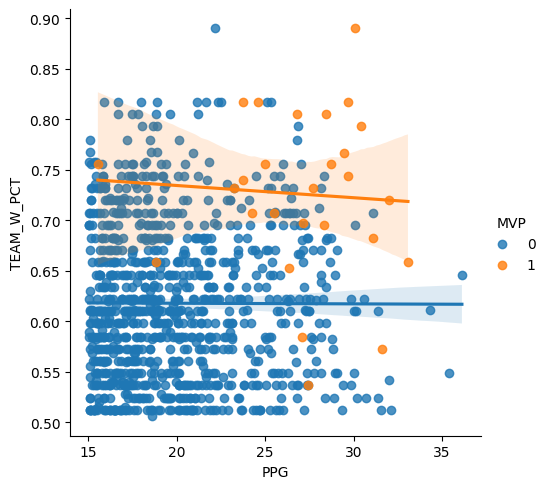

In [83]:
# Scatter plot of PPG vs TEAM_W_PCT thresholded at 15 PPG and 0.5 TEAM_W_PCT
sns.lmplot(x='PPG', y='TEAM_W_PCT', data=player_df.loc[(player_df['PPG'] > 15) & (player_df['TEAM_W_PCT'] > 0.5)], hue='MVP')


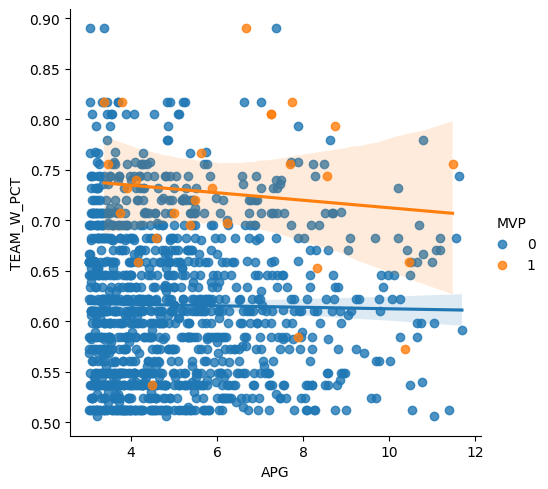

In [76]:
# Scatter plot of APG vs TEAM_W_PCT thresholded at 3 APG and 0.5 TEAM_W_PCT
sns.lmplot(x='APG', y='TEAM_W_PCT', data=player_df.loc[(player_df['APG'] > 3) & (player_df['TEAM_W_PCT'] > 0.5)], hue='MVP')

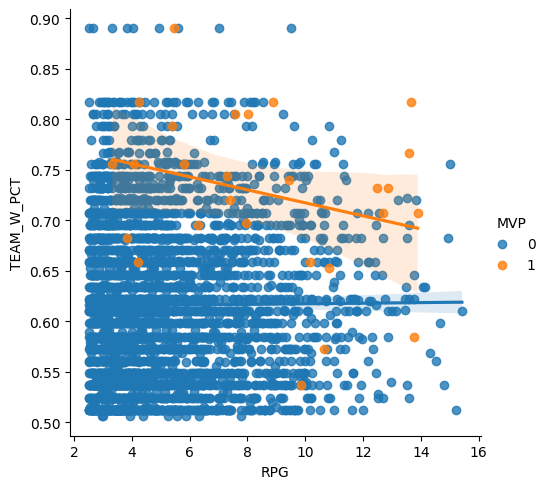

In [77]:
# Scatter plot of RPG vs TEAM_W_PCT thresholded at 2.5 RPG and 0.5 TEAM_W_PCT
sns.lmplot(x = 'RPG', y = 'TEAM_W_PCT', data = player_df.loc[(player_df['RPG'] > 2.5) & (player_df['TEAM_W_PCT'] > 0.5)], hue = 'MVP')

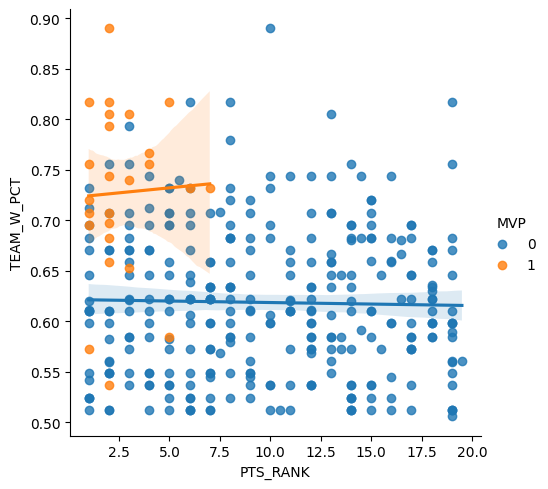

In [81]:
# Scatter plot of PTS_RANK vs TEAM_W_PCT with PTS_RANK thresholded at 50 and TEAM_W_PCT thresholded at 0.5
sns.lmplot(x = 'PTS_RANK', y = 'TEAM_W_PCT', data=player_df.loc[(player_df['PTS_RANK'] < 20) & (player_df['TEAM_W_PCT'] > 0.5)], hue = 'MVP')

<Axes: xlabel='MVP', ylabel='TEAM_W_PCT'>

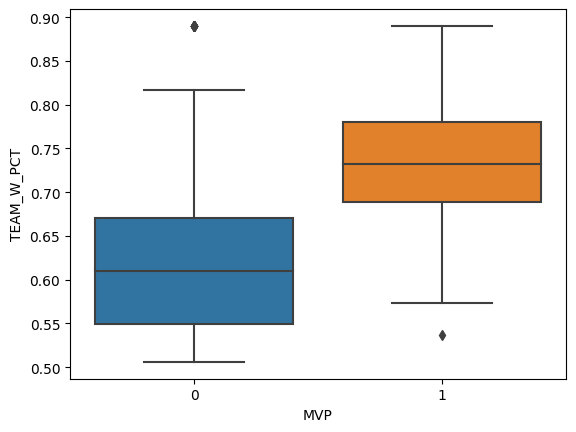

In [86]:
# Box plot of PPG vs MVP
sns.boxplot(x='MVP', y='TEAM_W_PCT', data=player_df[player_df['TEAM_W_PCT'] > 0.5])

<Axes: >

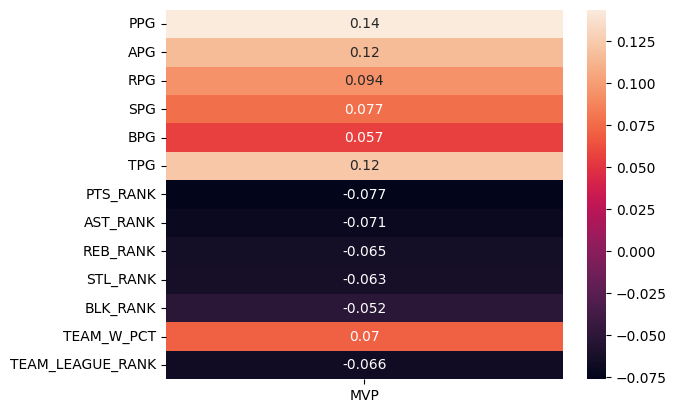

In [88]:
# Heatmap of PPG, APG, RPG, SPG, BPG, TPG, PTS_RANK, AST_RANK, REB_RANK, STL_RANK, BLK_RANK, TEAM_W_PCT, TEAM_LEAGUE_RANK vs MVP
sns.heatmap(corr_matrix.loc[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK'], ['MVP']], annot=True)

**Creating Model to Predict MVP:**
***Random Forest and Gradient Boosting Model***

In [90]:
# Random Forest Model and Gradient Boosting Model to predict MVP
# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score

# Split the data into training and testing sets
X = player_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
y = player_df['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Instantiate a random forest classifier: rf_clf
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
rf_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Random Forest Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Compute and print Recall and Precision scores for MVPs
print("Random Forest Model Recall: " + str(recall_score(y_test, y_pred)))
print("Random Forest Model Precision: " + str(precision_score(y_test, y_pred)))

# Instantiate a Gradient Boosting classifier: gb_clf
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Gradient Boosting Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Compute and print Recall and Precision scores for 
print("Gradient Boosting Model Recall: " + str(recall_score(y_test, y_pred)))
print("Gradient Boosting Model Precision: " + str(precision_score(y_test, y_pred)))




Random Forest Model Accuracy: 0.9979215380618343
Random Forest Model Recall: 0.125
Random Forest Model Precision: 0.5
Gradient Boosting Model Accuracy: 0.998181345804105
Gradient Boosting Model Recall: 0.375
Gradient Boosting Model Precision: 0.6


In [69]:
# Print the columns with the feature importances 
print("Random Forest Model Feature Importances:")
for feature, importance in zip(X.columns, rf_clf.feature_importances_):
    print(feature + ": " + str(importance))

print("\nGradient Boosting Model Feature Importances:")
for feature, importance in zip(X.columns, gb_clf.feature_importances_):
    print(feature + ": " + str(importance))

Random Forest Model Feature Importances:
PPG: 0.1118971151327914
APG: 0.06969655729057385
RPG: 0.08506297968311057
SPG: 0.04083804069138585
BPG: 0.05071925861225721
TPG: 0.05960332662694203
PTS_RANK: 0.137264668230245
AST_RANK: 0.0632155966680002
REB_RANK: 0.06963639621179692
STL_RANK: 0.034815132960888846
BLK_RANK: 0.05226704101780181
TEAM_W_PCT: 0.12490723754763501
TEAM_LEAGUE_RANK: 0.10007664932657132

Gradient Boosting Model Feature Importances:
PPG: 0.020807783050637466
APG: 0.046063726681403294
RPG: 0.10910533773791141
SPG: 0.0261749135652646
BPG: 0.0014203403594549488
TPG: 0.03658491624827009
PTS_RANK: 0.1719991719970372
AST_RANK: 0.10332510339479596
REB_RANK: 0.007450994270940613
STL_RANK: 0.0038204942428808454
BLK_RANK: 0.021272529757606413
TEAM_W_PCT: 0.3896287591078345
TEAM_LEAGUE_RANK: 0.06234592958596261


**Predictions using Random Forest Model**

In [70]:
# Get all unique years in the player_df
years = player_df['Year'].unique()

# Predict the MVP for each year using Random Forest Model
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = rf_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)



1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Michael Jordan
1998-99: No MVP
1999-00: Shaquille O'Neal - Shaquille O'Neal
2000-01: No MVP
2001-02: Tim Duncan - Tim Duncan
2002-03: Tim Duncan - Tim Duncan
2003-04: Kevin Garnett - Kevin Garnett
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - LeBron James
2013-14: No MVP
2014-15: No MVP
2015-16: Stephen Curry - Stephen Curry
2016-17: No MVP
2017-18: James Harden - James Harden
2018-19: No MVP
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: Nikola Jokic - Nikola Jokic
2022-23: Joel Embiid - Joel Embiid


**Predictions using Gradient Boosting Model**

In [71]:
# Predict the MVP for each year using Gradient Boosting Model
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)



1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Michael Jordan
1998-99: No MVP
1999-00: Shaquille O'Neal - Shaquille O'Neal
2000-01: No MVP
2001-02: Tim Duncan - Tim Duncan
2002-03: Tim Duncan - Tim Duncan
2003-04: Kevin Garnett - Kevin Garnett
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - Kevin Durant
2013-14: No MVP
2014-15: Stephen Curry - Stephen Curry
2015-16: Stephen Curry - Stephen Curry
2016-17: Russell Westbrook - Russell Westbrook
2017-18: James Harden - James Harden
2018-19: No MVP
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: Nikola Jokic - Nikola Jokic
2022-23: Joel Embiid - Joel Embiid


**Using GroupShuffleSplit to Split data**

In [91]:
# Predict the MVP for each year using GroupShuffleSplit
from sklearn.model_selection import GroupShuffleSplit

# Create a GroupShuffleSplit object
gss = GroupShuffleSplit(n_splits=10, test_size=0.3, random_state=21)

# Split the data into training and testing sets using the GroupShuffleSplit object
X = player_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
y = player_df['MVP']

train_idx, test_idx = next(gss.split(X, y, groups=player_df['Year']))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Instantiate a random forest classifier: rf_clf
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
rf_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Random Forest Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Instantiate a Gradient Boosting classifier: gb_clf
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=21)

# Compute and print recall and precision scores for the MVP class
print("Random Forest Model Recall: " + str(recall_score(y_test, y_pred)))
print("Random Forest Model Precision: " + str(precision_score(y_test, y_pred)))

# Fit the classifier to the training set
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Gradient Boosting Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Compute and print recall and precision scores for the MVP class
print("Gradient Boosting Model Recall: " + str(recall_score(y_test, y_pred)))
print("Gradient Boosting Model Precision: " + str(precision_score(y_test, y_pred)))




Random Forest Model Accuracy: 0.9984105358764759
Random Forest Model Recall: 0.3333333333333333
Random Forest Model Precision: 0.75
Gradient Boosting Model Accuracy: 0.9981834695731153
Gradient Boosting Model Recall: 0.4444444444444444
Gradient Boosting Model Precision: 0.5714285714285714


In [73]:
# Print the columns with the feature importances 
print("Random Forest Model after Group Shuffle Split Feature Importances:")
for feature, importance in zip(X.columns, rf_clf.feature_importances_):
    print(feature + ": " + str(importance))

print("\nGradient Boosting Model after Group Shuffle Split Feature Importances:")
for feature, importance in zip(X.columns, gb_clf.feature_importances_):
    print(feature + ": " + str(importance))

Random Forest Model after Group Shuffle Split Feature Importances:
PPG: 0.11629264812116408
APG: 0.0655482289940539
RPG: 0.06246525296044298
SPG: 0.04824613367403806
BPG: 0.04618309029026382
TPG: 0.08012901941166294
PTS_RANK: 0.1244815519188157
AST_RANK: 0.055875332755248135
REB_RANK: 0.05882380100602956
STL_RANK: 0.03610840816623659
BLK_RANK: 0.041633724454017015
TEAM_W_PCT: 0.14497751388634392
TEAM_LEAGUE_RANK: 0.11923529436168329

Gradient Boosting Model after Group Shuffle Split Feature Importances:
PPG: 0.15670280479012189
APG: 0.1140279881307362
RPG: 0.20789501998071414
SPG: 0.002440737157118358
BPG: 0.0029465599695146475
TPG: 0.0023348112144751716
PTS_RANK: 0.13369790209752938
AST_RANK: 0.12063147764201246
REB_RANK: 0.001626737068022571
STL_RANK: 0.00010871927449643757
BLK_RANK: 0.0
TEAM_W_PCT: 0.13042814056503754
TEAM_LEAGUE_RANK: 0.12715910211022136


In [74]:
# Predict the MVP for each year using Random Forest Model after Group Shuffle Split
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = rf_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)

1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Karl Malone
1998-99: Karl Malone - Karl Malone
1999-00: Shaquille O'Neal - Shaquille O'Neal
2000-01: Allen Iverson - Allen Iverson
2001-02: No MVP
2002-03: Tim Duncan - Tim Duncan
2003-04: No MVP
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - LeBron James
2013-14: Kevin Durant - Kevin Durant
2014-15: Stephen Curry - Stephen Curry
2015-16: Stephen Curry - Stephen Curry
2016-17: No MVP
2017-18: James Harden - James Harden
2018-19: Giannis Antetokounmpo - Giannis Antetokounmpo
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: No MVP
2022-23: Joel Embiid - Joel Embiid


In [75]:
# Predict the MVP for each year using Gradient Boosting Model after Group Shuffle Split
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)

1996-97: Karl Malone - Karl Malone
1997-98: Michael Jordan - Karl Malone
1998-99: Karl Malone - Karl Malone
1999-00: No MVP
2000-01: Allen Iverson - Allen Iverson
2001-02: No MVP
2002-03: Tim Duncan - Tim Duncan
2003-04: No MVP
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: Dirk Nowitzki - Dirk Nowitzki
2007-08: No MVP
2008-09: LeBron James - LeBron James
2009-10: LeBron James - LeBron James
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: LeBron James - LeBron James
2013-14: Kevin Durant - Kevin Durant
2014-15: Stephen Curry - Stephen Curry
2015-16: Stephen Curry - Stephen Curry
2016-17: Russell Westbrook - Russell Westbrook
2017-18: James Harden - James Harden
2018-19: Giannis Antetokounmpo - Giannis Antetokounmpo
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: Nikola Jokic - Nikola Jokic
2021-22: Nikola Jokic - Joel Embiid
2022-23: Joel Embiid - Joel Embiid


**WNBA Predictions**    

In [94]:
wnba_player_df = pd.read_excel('WNBA_game_data.xlsx')
wnba_team_df = pd.read_excel('WNBA_team_data.xlsx')

In [107]:
# Create a W_PCT_RANK for each team in wnba_team_df
wnba_team_df['W_PCT_RANK'] = wnba_team_df['W_PCT'].rank(ascending=False)
wnba_team_df['W_PCT_RANK'] = wnba_team_df['W_PCT_RANK'].astype(int)

In [ ]:
# Use the TEAM_ID and Year columns to create a column in player_df that shows the team's W_PCT for that season
wnba_player_df['TEAM_W_PCT'] = wnba_player_df.apply(lambda x: wnba_team_df.loc[(wnba_team_df['TEAM_ID'] == x['TEAM_ID']) & (wnba_team_df['Year'] == x['Year'])]['W_PCT'].values[0], axis=1)

# Use the TEAM_ID and Year columns to create a column in player_df that shows the team's LEAGUE_RANK for that season
wnba_player_df['TEAM_LEAGUE_RANK'] = wnba_player_df.apply(lambda x: wnba_team_df.loc[(wnba_team_df['TEAM_ID'] == x['TEAM_ID']) & (wnba_team_df['Year'] == x['Year'])]['W_PCT_RANK'].values[0], axis=1)

wnba_player_df.info()

In [ ]:
# Add an MVP column and set to 0 for all rows
wnba_player_df['MVP'] = 0   
wnba_player_df.info()

In [115]:
# For 2022, set A'ja Wilson as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2022) & (wnba_player_df['PLAYER_NAME'] == 'A\'ja Wilson'), 'MVP'] = 1

# For 2021, set Jonquel Jones as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2021) & (wnba_player_df['PLAYER_NAME'] == 'Jonquel Jones'), 'MVP'] = 1

# For 2020, set A'ja Wilson as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2020) & (wnba_player_df['PLAYER_NAME'] == 'A\'ja Wilson'), 'MVP'] = 1

# For 2019, set Elena Delle Donne as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2019) & (wnba_player_df['PLAYER_NAME'] == 'Elena Delle Donne'), 'MVP'] = 1

# For 2018, set Breanna Stewart as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2018) & (wnba_player_df['PLAYER_NAME'] == 'Breanna Stewart'), 'MVP'] = 1

# For 2017, set Sylvia Fowles as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2017) & (wnba_player_df['PLAYER_NAME'] == 'Sylvia Fowles'), 'MVP'] = 1

# For 2016, set Nneka Ogwumike as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2016) & (wnba_player_df['PLAYER_NAME'] == 'Nneka Ogwumike'), 'MVP'] = 1

# For 2015, set Elena Delle Donne as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2015) & (wnba_player_df['PLAYER_NAME'] == 'Elena Delle Donne'), 'MVP'] = 1

# For 2014, set Maya Moore as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2014) & (wnba_player_df['PLAYER_NAME'] == 'Maya Moore'), 'MVP'] = 1

# For 2013, set Candace Parker as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2013) & (wnba_player_df['PLAYER_NAME'] == 'Candace Parker'), 'MVP'] = 1

# For 2012, set Tina Charles as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2012) & (wnba_player_df['PLAYER_NAME'] == 'Tina Charles'), 'MVP'] = 1

# For 2011, set Tamika Catchings as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2011) & (wnba_player_df['PLAYER_NAME'] == 'Tamika Catchings'), 'MVP'] = 1

# For 2010, set Lauren Jackson as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2010) & (wnba_player_df['PLAYER_NAME'] == 'Lauren Jackson'), 'MVP'] = 1

# For 2009, set Diana Taurasi as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2009) & (wnba_player_df['PLAYER_NAME'] == 'Diana Taurasi'), 'MVP'] = 1

# For 2008, set Candace Parker as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2008) & (wnba_player_df['PLAYER_NAME'] == 'Candace Parker'), 'MVP'] = 1

# For 2007, set Lauren Jackson as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2007) & (wnba_player_df['PLAYER_NAME'] == 'Lauren Jackson'), 'MVP'] = 1

# For 2006, set Lisa Leslie as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2006) & (wnba_player_df['PLAYER_NAME'] == 'Lisa Leslie'), 'MVP'] = 1

# For 2005, set Sheryl Swoopes as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2005) & (wnba_player_df['PLAYER_NAME'] == 'Sheryl Swoopes'), 'MVP'] = 1

# For 2004, set Lisa Leslie as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2004) & (wnba_player_df['PLAYER_NAME'] == 'Lisa Leslie'), 'MVP'] = 1

# For 2003, set Lauren Jackson as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2003) & (wnba_player_df['PLAYER_NAME'] == 'Lauren Jackson'), 'MVP'] = 1

# For 2002, set Sheryl Swoopes as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2002) & (wnba_player_df['PLAYER_NAME'] == 'Sheryl Swoopes'), 'MVP'] = 1

# For 2001, set Lisa Leslie as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2001) & (wnba_player_df['PLAYER_NAME'] == 'Lisa Leslie'), 'MVP'] = 1

# For 2000, set Sheryl Swoopes as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 2000) & (wnba_player_df['PLAYER_NAME'] == 'Sheryl Swoopes'), 'MVP'] = 1

# For 1999, set Yolanda Griffith as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 1999) & (wnba_player_df['PLAYER_NAME'] == 'Yolanda Griffith'), 'MVP'] = 1

# For 1998, set Cynthia Cooper as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 1998) & (wnba_player_df['PLAYER_NAME'] == 'Cynthia Cooper'), 'MVP'] = 1

# For 1997, set Cynthia Cooper as the MVP
wnba_player_df.loc[(wnba_player_df['Year'] == 1997) & (wnba_player_df['PLAYER_NAME'] == 'Cynthia Cooper'), 'MVP'] = 1   

In [116]:
# Print all MVPs with Year and Player Name
wnba_player_df.loc[wnba_player_df['MVP'] == 1, ['Year', 'PLAYER_NAME']]

,Year,PLAYER_NAME
10,1997,Cynthia Cooper
120,1998,Cynthia Cooper
372,1999,Yolanda Griffith
531,2000,Sheryl Swoopes
687,2001,Lisa Leslie
940,2002,Sheryl Swoopes
1079,2003,Lauren Jackson
1257,2004,Lisa Leslie
1466,2005,Sheryl Swoopes
1610,2006,Lisa Leslie


In [118]:
# Create a points per game column
wnba_player_df['PPG'] = wnba_player_df['PTS'] / wnba_player_df['GP']

# Create an assists per game column
wnba_player_df['APG'] = wnba_player_df['AST'] / wnba_player_df['GP']

# Create a rebounds per game column
wnba_player_df['RPG'] = wnba_player_df['REB'] / wnba_player_df['GP']

# Create a steals per game column
wnba_player_df['SPG'] = wnba_player_df['STL'] / wnba_player_df['GP']

# Create a blocks per game column
wnba_player_df['BPG'] = wnba_player_df['BLK'] / wnba_player_df['GP']

# Create a turnovers per game column
wnba_player_df['TPG'] = wnba_player_df['TOV'] / wnba_player_df['GP']

In [119]:
# Create a column for total Points, Assists, Rebounds, Steals, and Blocks that ranks the player in the league for that stat for that season
wnba_player_df['PTS_RANK'] = wnba_player_df.groupby(['Year'])['PTS'].rank(ascending=False)
wnba_player_df['AST_RANK'] = wnba_player_df.groupby(['Year'])['AST'].rank(ascending=False)
wnba_player_df['REB_RANK'] = wnba_player_df.groupby(['Year'])['REB'].rank(ascending=False)
wnba_player_df['STL_RANK'] = wnba_player_df.groupby(['Year'])['STL'].rank(ascending=False)
wnba_player_df['BLK_RANK'] = wnba_player_df.groupby(['Year'])['BLK'].rank(ascending=False)

In [123]:
# Predict the MVP for each year using Gradient Boosting Model after Group Shuffle Split
years = wnba_player_df['Year'].unique()
for year in years:
    year_df = wnba_player_df.loc[wnba_player_df['Year'] == year]

    X = year_df[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'TPG', 'PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER_NAME'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER_NAME'].values[0]) + " - " + mvp_name)

1997: No MVP
1998: No MVP
1999: No MVP
2000: No MVP
2001: No MVP
2002: No MVP
2003: No MVP
2004: No MVP
2005: No MVP
2006: No MVP
2007: No MVP
2008: No MVP
2009: No MVP
2010: No MVP
2011: No MVP
2012: No MVP
2013: No MVP
2014: No MVP
2015: No MVP
2016: No MVP
2017: No MVP
2018: No MVP
2019: No MVP
2020: No MVP
2021: No MVP
2022: No MVP
2023: No MVP


In [124]:
# Random Forest Model and Gradient Boosting Model to predict MVP
# import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score

# Split the data into training and testing sets
X = player_df[['PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
y = player_df['MVP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Instantiate a random forest classifier: rf_clf
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
rf_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Random Forest Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Compute and print Recall and Precision scores for MVPs
print("Random Forest Model Recall: " + str(recall_score(y_test, y_pred)))
print("Random Forest Model Precision: " + str(precision_score(y_test, y_pred)))

# Instantiate a Gradient Boosting classifier: gb_clf
gb_clf = GradientBoostingClassifier(n_estimators=1000, random_state=21)

# Fit the classifier to the training set
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb_clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print("Gradient Boosting Model Accuracy: " + str(accuracy_score(y_test, y_pred)))

# Compute and print Recall and Precision scores for 
print("Gradient Boosting Model Recall: " + str(recall_score(y_test, y_pred)))
print("Gradient Boosting Model Precision: " + str(precision_score(y_test, y_pred)))


Random Forest Model Accuracy: 0.998181345804105
Random Forest Model Recall: 0.25
Random Forest Model Precision: 0.6666666666666666
Gradient Boosting Model Accuracy: 0.998181345804105
Gradient Boosting Model Recall: 0.25
Gradient Boosting Model Precision: 0.6666666666666666


In [126]:
# Predict the MVP for each year using Gradient Boosting Model after Group Shuffle Split
years = wnba_player_df['Year'].unique()
for year in years:
    year_df = wnba_player_df.loc[wnba_player_df['Year'] == year]

    X = year_df[['PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER_NAME'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER_NAME'].values[0]) + " - " + mvp_name)

1997: Cynthia Cooper - Ruthie Bolton
1998: Cynthia Cooper - Jennifer Gillom
1999: Yolanda Griffith - Yolanda Griffith
2000: No MVP
2001: No MVP
2002: Sheryl Swoopes - Chamique Holdsclaw
2003: Lauren Jackson - Chamique Holdsclaw
2004: Lisa Leslie - Lauren Jackson
2005: Sheryl Swoopes - Lauren Jackson
2006: No MVP
2007: Lauren Jackson - Lauren Jackson
2008: Candace Parker - Diana Taurasi
2009: Diana Taurasi - Diana Taurasi
2010: No MVP
2011: Tamika Catchings - Angel McCoughtry
2012: Tina Charles - Angel McCoughtry
2013: No MVP
2014: No MVP
2015: Elena Delle Donne - Elena Delle Donne
2016: Nneka Ogwumike - Elena Delle Donne
2017: Sylvia Fowles - Breanna Stewart
2018: Breanna Stewart - Liz Cambage
2019: Elena Delle Donne - Brittney Griner
2020: No MVP
2021: Jonquel Jones - Brittney Griner
2022: A'ja Wilson - Breanna Stewart
2023: No MVP


In [128]:
# Predict the MVP for each year using Gradient Boosting Model after Group Shuffle Split
years = player_df['Year'].unique()
for year in years:
    year_df = player_df.loc[player_df['Year'] == year]

    X = year_df[['PTS_RANK', 'AST_RANK', 'REB_RANK', 'STL_RANK', 'BLK_RANK', 'TEAM_W_PCT', 'TEAM_LEAGUE_RANK']]
    y = year_df['MVP']

    # Predict the MVP for the year
    y_pred = gb_clf.predict(X)

    if y_pred.sum() == 0:
        print(str(year) + ": No MVP")
        continue

    # Get the name of the predicted MVP from y_pred
    mvp_name = year_df.loc[y_pred == 1]['PLAYER'].values[0]

    # Print the MVP of the year and the predicted MVP
    print(str(year) + ": " + str(year_df.loc[year_df['MVP'] == 1]['PLAYER'].values[0]) + " - " + mvp_name)

1996-97: Karl Malone - Karl Malone
1997-98: No MVP
1998-99: No MVP
1999-00: No MVP
2000-01: No MVP
2001-02: No MVP
2002-03: No MVP
2003-04: No MVP
2004-05: Steve Nash - Steve Nash
2005-06: Steve Nash - Steve Nash
2006-07: No MVP
2007-08: Kobe Bryant - Kobe Bryant
2008-09: No MVP
2009-10: No MVP
2010-11: Derrick Rose - Derrick Rose
2011-12: LeBron James - LeBron James
2012-13: No MVP
2013-14: No MVP
2014-15: No MVP
2015-16: No MVP
2016-17: Russell Westbrook - Russell Westbrook
2017-18: James Harden - LeBron James
2018-19: No MVP
2019-20: Giannis Antetokounmpo - Giannis Antetokounmpo
2020-21: No MVP
2021-22: Nikola Jokic - Nikola Jokic
2022-23: Joel Embiid - Joel Embiid
